# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how = "left", on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mouse_count = merged_df['Mouse ID'].nunique()
unique_mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
identify_duplicates = merged_df[merged_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice = identify_duplicates['Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_info = merged_df[merged_df['Mouse ID'].isin(duplicate_mice)]
duplicate_mouse_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_duplicate_mouse = merged_df[merged_df['Mouse ID'].isin(duplicate_mice) == False]
cleaned_df = pd.DataFrame(remove_duplicate_mouse)
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
no_duplicate_mouse_count = cleaned_df['Mouse ID'].nunique()
no_duplicate_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drugs = cleaned_df.drop_duplicates(['Drug Regimen'])['Drug Regimen']
mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
variance = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
standard_deviation = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()


# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({"Mean": mean
                                 ,"Median": median
                                 ,"Variance": variance
                                 ,"Std. Dev.": standard_deviation
                                 ,"Std. Err.": sem
                                }, index = drugs)
# Formatting the df
summary_stats_df = summary_stats_df.sort_values(['Drug Regimen'], ascending = True)
summary_stats_df['Mean'] = summary_stats_df['Mean'].round(3)
summary_stats_df['Median'] = summary_stats_df['Median'].round(3)
summary_stats_df['Variance'] = summary_stats_df['Variance'].round(3)
summary_stats_df['Std. Dev.'] = summary_stats_df['Std. Dev.'].round(3)
summary_stats_df['Std. Err.'] = summary_stats_df['Std. Err.'].round(3)

# Print results
summary_stats_df

,Mean,Median,Variance,Std. Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [8]:
### A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats_agg =  pd.DataFrame(cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg({'mean'
                                                                               ,'median'
                                                                               ,'var'
                                                                               ,'std'
                                                                               ,'sem'}))

summary_stats_agg = summary_stats_agg.rename(columns = {"std": 'Std. Dev.'
                                                       ,"mean": 'Mean'
                                                       ,"var": 'Variance'
                                                       ,"median": 'Median'
                                                       ,"sem": 'Std. Err.'
                                                       ,"Tumor Volume (mm3)": 'Tumor Volume'})

summary_stats_agg


# Using the aggregation method, produce the same summary statistics in a single line

Tumor Volume                                          
                     Mean Std. Dev.   Variance Std. Err.     Median
Drug Regimen                                                       
Capomulin       40.675741  4.994774  24.947764  0.329346  41.557809
Ceftamin        52.591172  6.268188  39.290177  0.469821  51.776157
Infubinol       52.884795  6.567243  43.128684  0.492236  51.820584
Ketapril        55.235638  8.279709  68.553577  0.603860  53.698743
Naftisol        54.331565  8.134708  66.173479  0.596466  52.509285
Placebo         54.033581  7.821003  61.168083  0.581331  52.288934
Propriva        52.320930  6.622085  43.852013  0.544332  50.446266
Ramicane        40.216745  4.846308  23.486704  0.320955  40.673236
Stelasyn        54.233149  7.710419  59.450562  0.573111  52.431737
Zoniferol       53.236507  6.966589  48.533355  0.516398  51.818479

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

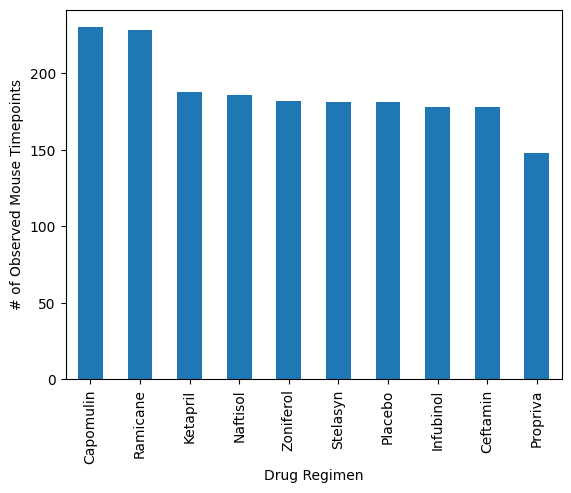

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
per_drug_mouse_count = cleaned_df['Drug Regimen'].value_counts()

pd_bar_plot = per_drug_mouse_count.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

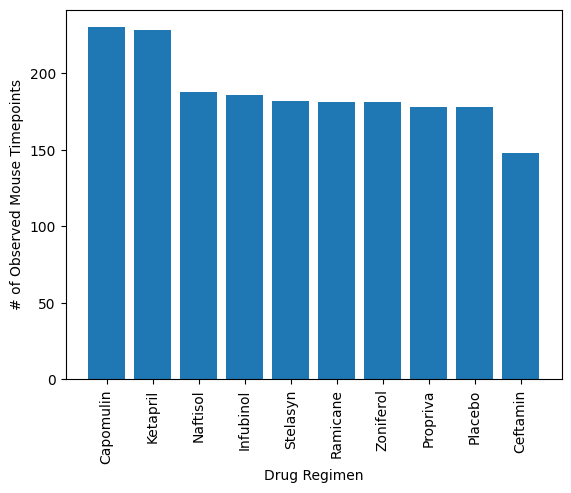

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
py_bar_x_axis = cleaned_df['Drug Regimen'].unique()
py_bar_y_axis = cleaned_df['Drug Regimen'].value_counts()

plt.bar(py_bar_x_axis, py_bar_y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = 'vertical')
plt.show()

Text(0, 0.5, 'Sex')

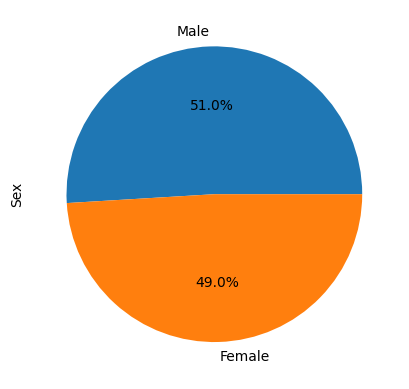

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
per_sex_mouse_count = cleaned_df['Sex'].value_counts()

pd_pie_plot = per_sex_mouse_count.plot.pie(autopct = '%1.1f%%')
plt.ylabel('Sex')

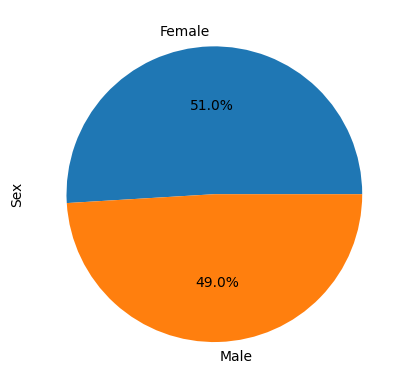

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
py_pie_values = cleaned_df['Sex'].value_counts()
py_pie_labels = ['Female', 'Male']

plt.pie(py_pie_values, labels = py_pie_labels, autopct = '%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# DataFrame for sample drugs
sample_drugs = pd.DataFrame(cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin') 
                                           | (cleaned_df['Drug Regimen'] == 'Ramicane') 
                                           | (cleaned_df['Drug Regimen'] == 'Infubinol') 
                                           | (cleaned_df['Drug Regimen'] == 'Ceftamin'), :])

# Start by getting the last (greatest) timepoint for each mouse
sample_max = pd.DataFrame(sample_drugs.groupby(['Mouse ID', 'Drug Regimen']).max()['Timepoint'])
sample_max = sample_max.rename(columns = {'Timepoint': 'Max Timepoint'})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# I ended up merging the maximum values to a DF only containing the sample drug regimens. 
sample_merge = pd.merge(sample_drugs, sample_max, how = 'left', on = ['Mouse ID', 'Drug Regimen'])

# Separate the DF into the four sample drug regimens. 
capomulin = pd.DataFrame(sample_merge.loc[sample_merge['Drug Regimen'] == 'Capomulin', :])
ramicane = pd.DataFrame(sample_merge.loc[sample_merge['Drug Regimen'] == 'Ramicane', :])
infubinol = pd.DataFrame(sample_merge.loc[sample_merge['Drug Regimen'] == 'Infubinol', :])
ceftamin = pd.DataFrame(sample_merge.loc[sample_merge['Drug Regimen'] == 'Ceftamin', :])


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
544,i557,30,45.261384,0,Capomulin,Female,1,24,45
535,y793,25,38.992734,2,Capomulin,Male,17,17,45
536,z581,25,54.316407,2,Infubinol,Female,24,25,45
537,s508,25,36.338569,0,Ramicane,Male,1,17,45
...,...,...,...,...,...,...,...,...,...
173,m756,5,47.010364,1,Infubinol,Male,19,30,5
73,t573,0,45.000000,0,Ceftamin,Female,15,27,0
68,x226,0,45.000000,0,Ceftamin,Male,23,28,0
64,b447,0,45.000000,0,Ceftamin,Male,2,30,0


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [ ]:
## trying to group the drug maximums: 


#capomulin = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin', :]
#capomulin_max = capomulin.groupby('Mouse ID').max()['Timepoint']
#capomulin_df = pd.DataFrame(capomulin.set_index(['Mouse ID'])[['Timepoint', 'Drug Regimen']])
#capomulin_df = capomulin_df.assign(Max_Timepoints = capomulin_max)
#capomulin_merged = pd.merge(cleaned_df, capomulin_df, how = 'left', on = ['Mouse ID', 'Drug Regimen', 'Timepoint'])

#ramicane = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Ramicane', :]
#ramicane_max = ramicane.groupby('Mouse ID').max()['Timepoint']
#ramicane_df = pd.DataFrame(ramicane.set_index(['Mouse ID'])[['Timepoint', 'Drug Regimen']])
#ramicane_df = ramicane_df.rename(columns = {'Timepoint': 'Max Timepoint'})
#ramicane_merged = pd.merge(cleaned_df, ramicane_df, how = 'left', on = ['Mouse ID'])

#infubinol = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Infubinol', :]
#infubinol_df = pd.DataFrame(infubinol.groupby('Mouse ID').max()['Timepoint'])
#infubinol_df = infubinol_df.rename(columns = {'Timepoint': 'Max Timepoint'})
#infubinol_merged = pd.merge(cleaned_df, infubinol_df, how = 'left', on = ['Mouse ID'])

#ceftamin = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Ceftamin', :]
#ceftamin_df = pd.DataFrame(ceftamin.groupby('Mouse ID').max()['Timepoint'])
#ceftamin_df = ceftamin_df.rename(columns = {'Timepoint': 'Max Timepoint'})
#ceftamin_merged = pd.merge(cleaned_df, ceftamin_df, how = 'left', on = ['Mouse ID'])